# House sales


## Introduction
The data set that will be discussed will be the dataset on home sales prices from May 2014 to 2015 in Seattle and King County, WA. The dataset has 21,613 rows and 21 columns with the following variables:

| Variable | Description |
| --- | --- |
| id |  a numerical identity field for each house sale |
| date | date when the house is sold |
| price | house sale price amount in US dollars |
| bedrooms | number of bedrooms in the house |
| bathrooms |  number of bathrooms in the house
| sqft_living| living area in square feet |
| sqft_lot | total lot area in square feet |
| floors | number of floors in the house |
|waterfront | binary field, 1 if the house has a waterfront, 0 for no waterfront |
|view | binary field, 1 if the house has a view, 0 for no view |
|condition | a number denoting the condition of the house |
|grade | number denoting the grade of the house |
|sqft_above | square feet above ground |
|sqft_basement | area in square feet if the house has a basement |
|yr_built | in which year is the house built |
|yr_renovated | year when a house is renovated, 0 if not renovated |
|zipcode | house location zipcode in the county |
|lat | latitude cooridnate |
|long | longitude coordinate |

The dependent variable for this dataset will be price. This project will determine which variables listed above are suitable explantatory variables for price. Explanatory variables will also be based on the analysts' reasoning.

## Data Importing and Preprocessing

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

In [2]:
## Imorting the csv file of the house sales data as a dataframe.
df = pd.read_csv("house_sales.csv",sep=",")
rows_old = df.shape[0] # storing df rows before dropped NANs
df.info() # data types of each column (int64, object or float64)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       20479 non-null  float64
 4   bathrooms      20545 non-null  float64
 5   sqft_living    20503 non-null  float64
 6   sqft_lot       20569 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# further fixing the date for regression later on 
df['Year'] = df['date'].astype(str).str[:4]
df['Month'] = df['date'].astype(str).str[4:6]
df['Day'] = df['date'].astype(str).str[6:8]

df['DATE'] = pd.to_datetime(df[['Year', 'Month','Day']])
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day,DATE
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,2014-10-13
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,09,2014-12-09


In [4]:
df.drop(['date','Month','Day','zipcode',],axis=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Year,DATE
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,2014-10-13
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,2014-12-09
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2015-02-25
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,2014-12-09
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3,...,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,2014-05-21
21609,6600060120,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3,...,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2015-02-23
21610,1523300141,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3,...,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,2014-06-23
21611,291310100,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3,...,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,2015-01-16


In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
Year                0
Month               0
Day                 0
DATE                0
dtype: int64

In [6]:
#checking for duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

# DATA Missing 

In [7]:
#filling the missing data with median and mean
df['bedrooms'].fillna(df['bedrooms'].median(),inplace = True)
df['bathrooms'].fillna(df['bathrooms'].median(),inplace = True)
df['sqft_living'].fillna(df['sqft_living'].mean(),inplace = True)
df['sqft_lot'].fillna(df['sqft_lot'].mean(), inplace =True )

In [8]:
#checking if i have any more missing data 
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Year             0
Month            0
Day              0
DATE             0
dtype: int64

In [9]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.353260,2.120252,2081.073697,15179.820507,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312049,367127.196483,0.909770,0.750257,891.234976,40471.743832,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1450.000000,5140.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1980.000000,7830.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2510.000000,11867.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,12050.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# removing the outliers 

In [10]:
df[df['price'].between(321950, 645000)]
df[df['bedrooms'].between(1,6)]
df[df['sqft_living'].between(1430, 2550)]
df[df['sqft_lot'].between(5146, 11548.75)]



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day,DATE
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,2014-10-13
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,09,2014-12-09
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,02,25,2015-02-25
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,02,18,2015-02-18
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0,...,0,98003,47.3097,-122.327,2238,6819,2014,06,27,2014-06-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,249000205,20141015T000000,1537000.0,5.0,3.75,4470.0,8088.0,2.0,0,0,...,0,98004,47.6321,-122.200,2780,8964,2014,10,15,2014-10-15
21603,7852140040,20140825T000000,507250.0,3.0,2.50,2270.0,5536.0,2.0,0,0,...,0,98065,47.5389,-121.881,2270,5731,2014,08,25,2014-08-25
21605,3448900210,20141014T000000,610685.0,4.0,2.50,2520.0,6023.0,2.0,0,0,...,0,98056,47.5137,-122.167,2520,6023,2014,10,14,2014-10-14
21606,7936000429,20150326T000000,1007500.0,4.0,3.50,3510.0,7200.0,2.0,0,0,...,0,98136,47.5537,-122.398,2050,6200,2015,03,26,2015-03-26


# Correlation 

In [11]:
#correlation table 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.004616,0.002101,-0.011431,-0.129849,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.302493,0.515365,0.681806,0.086295,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.004616,0.302493,1.000000,0.487280,0.549012,0.027169,0.172168,-0.005045,0.079782,0.028137,0.348556,0.465769,0.291689,0.150364,0.019269,-0.149544,-0.008874,0.126537,0.381110,0.024089
bathrooms,0.002101,0.515365,0.487280,1.000000,0.714817,0.083221,0.487859,0.067113,0.181425,-0.123002,0.648745,0.667757,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509
sqft_living,-0.011431,0.681806,0.549012,0.714817,1.000000,0.160199,0.345740,0.105058,0.276703,-0.057778,0.744523,0.851347,0.420815,0.311365,0.055698,-0.194479,0.049772,0.233190,0.737337,0.175682
sqft_lot,-0.129849,0.086295,0.027169,0.083221,0.160199,1.000000,-0.005540,0.020712,0.072944,-0.008930,0.109002,0.176906,0.015212,0.050872,0.008758,-0.128141,-0.085408,0.223964,0.141840,0.717743
floors,0.018525,0.256794,0.172168,0.487859,0.345740,-0.005540,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.005045,0.067113,0.105058,0.020712,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079782,0.181425,0.276703,0.072944,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028137,-0.123002,-0.057778,-0.008930,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<AxesSubplot:>

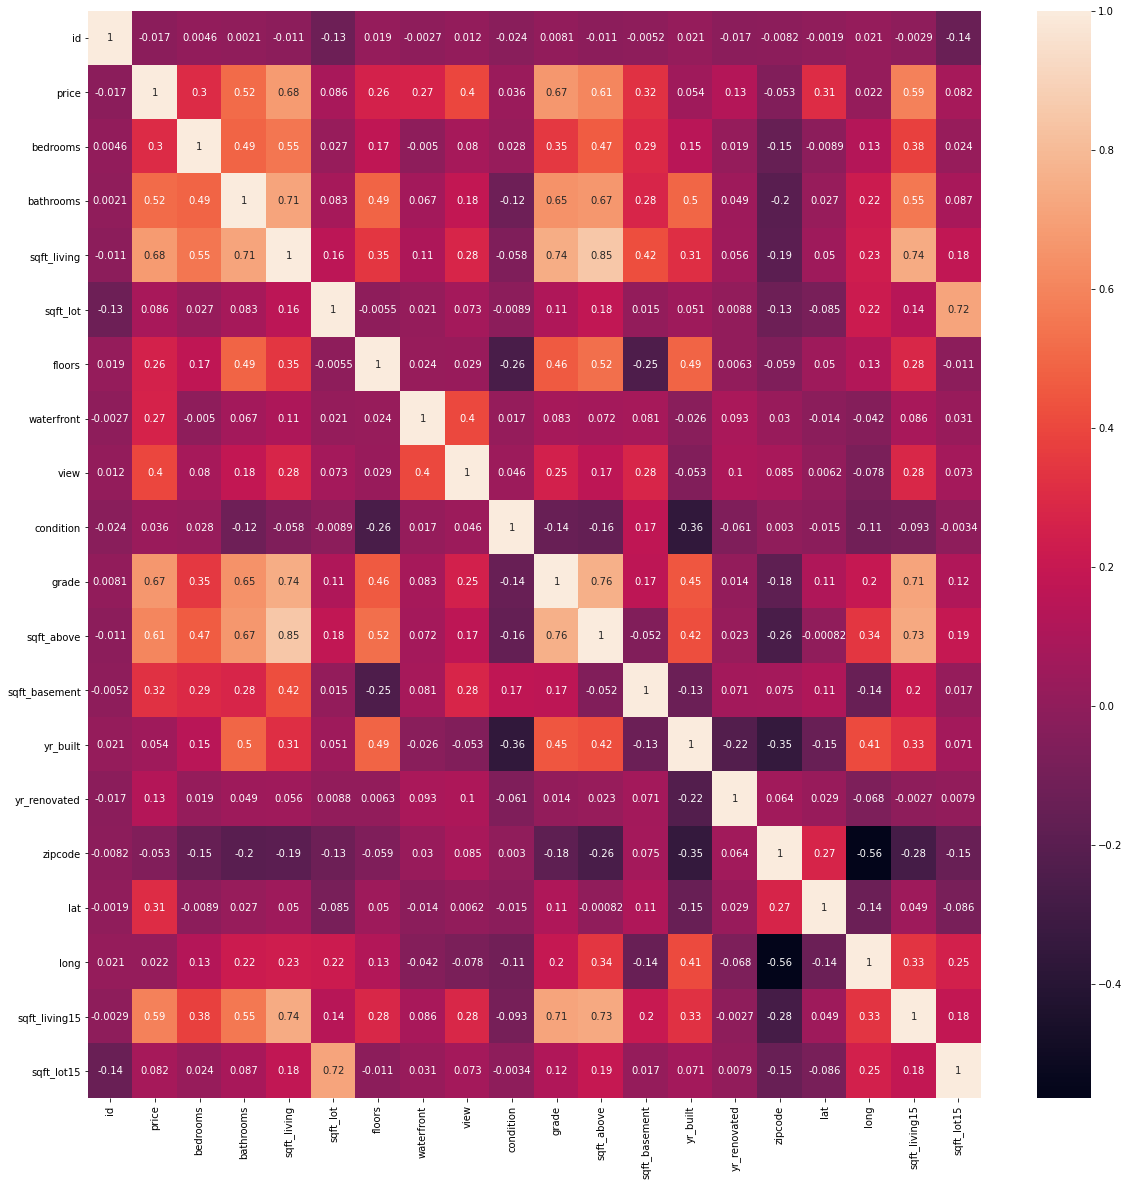

In [12]:
# calculate correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax = ax)# plot the heatmap

# Provide measures of centrality and distribution with visualizations


In [13]:
# printing out the mean, madian and mode of the data set 
print('Measure of centrality are the mean,median and mode')
print('mean of the dataset is', df.mean())




Measure of centrality are the mean,median and mode
mean of the dataset is id               4.580302e+09
price            5.400881e+05
bedrooms         3.353260e+00
bathrooms        2.120252e+00
sqft_living      2.081074e+03
sqft_lot         1.517982e+04
floors           1.494309e+00
waterfront       7.541757e-03
view             2.343034e-01
condition        3.409430e+00
grade            7.656873e+00
sqft_above       1.788391e+03
sqft_basement    2.915090e+02
yr_built         1.971005e+03
yr_renovated     8.440226e+01
zipcode          9.807794e+04
lat              4.756005e+01
long            -1.222139e+02
sqft_living15    1.986552e+03
sqft_lot15       1.276846e+04
Year                      inf
Month                     inf
Day                       inf
dtype: float64


<ipython-input-13-b4c04a941855>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print('mean of the dataset is', df.mean())


In [14]:
print('median of the dataset  is', df.median())

median of the dataset  is id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.980000e+03
sqft_lot         7.830000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222300e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
Year             2.014000e+03
Month            6.000000e+00
Day              1.600000e+01
dtype: float64


<ipython-input-14-f996399031f4>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print('median of the dataset  is', df.median())


In [15]:
print('mode of the dataset  is' )
df.mode()

mode of the dataset  is


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Day,DATE
0,795000620.0,20140623T000000,350000.0,3.0,2.5,2081.073697,15179.820507,1.0,0.0,0.0,...,0.0,98103.0,47.5322,-122.29,1540.0,5000.0,2014,05,23,2014-06-23
1,NaN,NaN,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.5491,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.6624,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,47.6846,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# distribution with visualizations

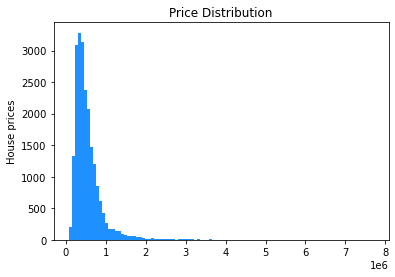

In [16]:
# Create basic histogram
fig = plt.figure()
plt.hist(df['price'], bins= 100,color="dodgerblue")
#sns.distplot(df['price']) 


plt.ylabel('House prices') # creates label for y axis
plt.title('Price Distribution')# creates title
plt.show()

### As you see we have right skewed or positivly skewed graph that means the houses that are under  the average which is 54,0412 got more sold than above the average.

#### Independent variables:
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- zipcode
- lat
- long
- year
- date

#### Dependent variables:
- price

### Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

In [17]:
# Understanding Your Variables
df.shape

(21613, 25)

In [18]:
# the unigue variables inside the columns 
df.nunique(axis=0)

id               21436
date               372
price             4028
bedrooms            12
bathrooms           30
sqft_living       1015
sqft_lot          9472
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
Year                 2
Month               12
Day                 31
DATE               372
dtype: int64

# Data visualizations 

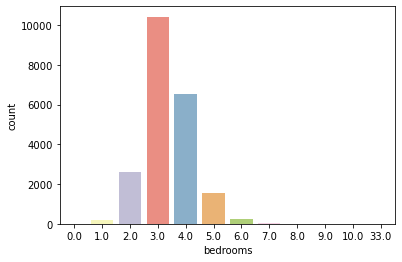

In [19]:
# Seaborn bar charts, changing color

df1 = sns.countplot(x="bedrooms", data=df, palette="Set3")

In [20]:
#trying to find the mean and max and mini price of the  house with the number of the bedrooms 
df_1room = df[(df.bedrooms == 1) &(df.price)]
print('The avg price for 1 rooms is',np.around(df_1room.price.mean(),))

df_2room = df[(df.bedrooms == 2) &(df.price)]
print('The avg price for 2 rooms is',np.around(df_2room.price.mean(),))


df_3room = df[(df.bedrooms == 3) &(df.price)]
print('The avg price for 3 rooms is',np.around(df_3room.price.mean(),))

df_4room = df[(df.bedrooms == 4) &(df.price)]
print('The avg price for 4 rooms is',np.around(df_4room.price.mean(),))

df_5room = df[(df.bedrooms == 5) &(df.price)]
print('The avg price for 5 rooms is',np.around(df_5room.price.mean(),))

df_6room = df[(df.bedrooms == 6) &(df.price)]
print('The avg price for 6 rooms is',np.around(df_6room.price.mean(),))


The avg price for 1 rooms is 319995.0
The avg price for 2 rooms is 401178.0
The avg price for 3 rooms is 472899.0
The avg price for 4 rooms is 635018.0
The avg price for 5 rooms is 792706.0
The avg price for 6 rooms is 823185.0


## Summary
The most frequently sold home is the three-bedroom one, with an average price of $47289.0. The least frequently sold homes are the one bedroom and six bedroom,the average price for six bedroom was 823k and for the house with one bedroom the avgerage price for it is 319k

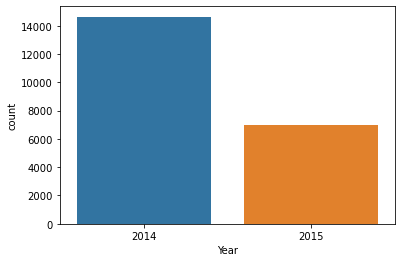

In [21]:
sns.countplot(x='Year', data =df)
plt.show()

In [22]:
#avg price in 2014
df_14 = df[(df.Year == "2014") &(df.price)]
print('The avg price in 2014 is',np.around(df_14.price.mean(),))
df_15 = df[(df.Year == "2015") &(df.price)]
print('The avg price in 2015 is',np.around(df_15.price.mean(),))

The avg price in 2014 is 539181.0
The avg price in 2015 is 541989.0


# Summary
More houses got sold in 2014 and the reason for that was that in 2015 the prices of the houses went up by 10K.

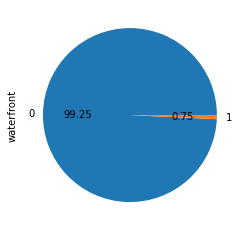

In [23]:
#how many houses has waterfront 
#grapging Pie Chart
df.waterfront.value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

# Summary
people refer houses with no waterfront 

In [24]:
df = df.dropna()

In [25]:
x=df[['sqft_living','sqft_lot','bedrooms','bathrooms']]
y= df['price']
x= sm.add_constant(x)
model=sm.OLS(y,x).fit()
p= model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     4907.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:51:08   Log-Likelihood:            -3.0062e+05
No. Observations:               21613   AIC:                         6.013e+05
Df Residuals:                   21608   BIC:                         6.013e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.477e+04   7285.055      3.400      0.001    1.05e+04     3.9e+04
sqft_living   285.9808      3.111     91.937      0.000     279.884     292.078
sqft_lot       -0.2563      0.045     -5.646      0.000      -0.345      -0.167
bedrooms    -4.675e+04   2414.948    -19.359      0.000   -5.15e+04    -4.2e+04
bathrooms    3.813e+04   3494.085     10.911      0.000    3.13e+04     4.5e+04
==============================================================================
Omnibus:                    16771.851   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1061658.834
Skew:                           3.217   Prob(JB):                         0.00
Kurtosis:                      36.727   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The linear equation for this model is:
> y = 285.9808$x_{1}$ - 4.675e+04$x_{2}$ - 0.2563$x_{3}$ + 3.813e+04$x_{4}$ + 2.477e+04, where:
- $y$ is price
- $x_{1}$ is sqft_living 
- $x_{2}$ is bedrooms
- $x_{3}$ is sqft_lot
- $x_{4}$ is bathrooms 

# Data Analysis

We have see the given dataset is labeled then we can go for the 'supervised learning'. 
In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

Reference:
AWS <i>What is Data Lebelling</i> https://aws.amazon.com/sagemaker/data-labeling/what-is-data-labeling/

### Random Forest Technique

### Training and Testing Sets
This is the last step of data preparation where we split the data into training and test datasets, 
in order to be able to measure the model performance.

#### The following code splits the data sets with another single line:

In [26]:
# Determining the x and y variables: x being independent and y being dependent variables

x=df[['sqft_living','sqft_lot','bedrooms', 'bathrooms']]
y= df['price']
print(x)
print(y)

       sqft_living  sqft_lot  bedrooms  bathrooms
0           1180.0    5650.0       3.0       1.00
1           2570.0    7242.0       3.0       2.25
2            770.0   10000.0       2.0       1.00
3           1960.0    5000.0       4.0       3.00
4           1680.0    8080.0       3.0       2.00
...            ...       ...       ...        ...
21608       1530.0    1131.0       3.0       2.50
21609       2310.0    5813.0       4.0       2.50
21610       1020.0    1350.0       2.0       0.75
21611       1600.0    2388.0       3.0       2.50
21612       1020.0    1076.0       2.0       0.75

[21613 rows x 4 columns]
0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


In [27]:
result = df.dtypes
result

id                        int64
date                     object
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
Year                     object
Month                    object
Day                      object
DATE             datetime64[ns]
dtype: object

In [28]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 0)

### Fit Random forest regressor to the dataset 

In [41]:
y_test=y_test.max()

In [29]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

# Making the Header in BOLD
print('\033[1m'+'Predicted House Prices:-'+'\033[0m')

# Printing the prices of house in propoer format
for i in range(0, 10):    
    print(y_pred[i]), 

Predicted House Prices:-
412171.12
1011378.47
459679.99
398749.5
741830.68
435383.2
398915.64
539721.5
608907.99
1513184.8


### Fit Random forest regressor to the dataset

In [30]:
from sklearn import metrics
errors = metrics.mean_absolute_error(y_test,y_pred)
print('\033[1m'+'Mean Absolute Error: '+'\033[0m', metrics.mean_absolute_error(y_test,y_pred))
print('\033[1m'+'Mean Squared Error: '+'\033[0m', metrics.mean_squared_error(y_test,y_pred))
print('\033[1m'+'Root Mean Squared Error: '+'\033[0m', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  162440.99033927466
Mean Squared Error:  59416987204.71299
Root Mean Squared Error:  243755.99932045361


### Determine Performance Metrics

In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('\033[1m'+'Accuracy:'+'\033[0m', round(accuracy, 2), '%.')

Accuracy: 97.08 %.


### Conclusion
We have predicted the 'house prices' using the random-forest algorithm with the accuracy of the predictions was 97 accuracy.